In [84]:
using Pkg
Pkg.activate("../..")

  Activating environment at `~/Documents/repos/nanoOpt.jl/Project.toml`


In [85]:
using LazyGrids,Interpolations,DataFrames,CSV,SpecialFunctions,Measures,LaTeXStrings,Plots; pyplot()

Plots.PyPlotBackend()

In [86]:
include("../../src/NanoOpt.jl")

In [87]:
mat1 = material(1.5^2,1.0)
mat2 = material(epstable("silver"),1.0)
mat3 = material(1.0,1.0);
mat3a = material(1.05,1.0);

In [88]:
λ = 620.0
k₀ = 2π/λ

d = 50.0;

In [89]:
k= mat1.k(k₀)
kpar = LinRange(0,0.999*k,100)[:,1]
ϕ = @. 180 * asin(kpar/k)/π;

In [90]:
layer = layerstructure([mat1,mat2],[0.0,],"up")
slab = slabstructure([mat1,mat2,mat3],d)

slaba = slabstructure([mat1,mat2,mat3a],d);

In [91]:
rtC1 = rtcoeffs(layer,k₀,kpar,"up")
r1,t1 = rtC1.r,rtC1.t;

In [92]:
rtC2 = rtcoeffs(slab,k₀,kpar,"up")
r2,t2 = rtC2.r,rtC2.t;

In [93]:
rtC3 = rtcoeffs(slaba,k₀,kpar,"up")
r3,t3 = rtC3.r,rtC3.t;

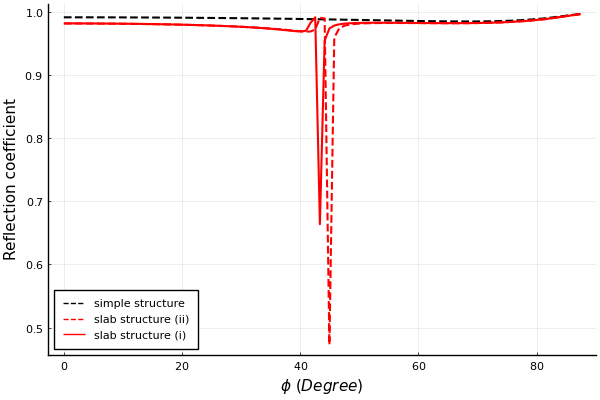

In [94]:
plot(ϕ,abs.(r1.TM),c=:black,ls=:dash,lw=1.5,label="simple structure")
plot!(ϕ,abs.(r3.TM),c=:red,lw=1.5,ls=:dash,label="slab structure (ii)")
plot!(ϕ,abs.(r2.TM),c=:red,lw=1.5,label="slab structure (i)",legend=:bottomleft,xlabel=L"\phi~ (Degree)",ylabel="Reflection coefficient")

# ======================================================+

In [95]:
εᵢ = 1.0

Δε = -0.4:0.1:0.4
i = 10
mat1 = material(1.5^2,1.0)
mat2 = material(epstable("silver"),1.0)
mat3 = material(εᵢ ,1.0);

In [96]:
layer = layerstructure([mat1,mat2,mat3],[0.0,d],"up")
rtC = rtcoeffs(layer,k₀,kpar,"up")
r,t = rtC.r,rtC.t
ind = findall(abs.(r.TM) .== minimum(abs.(r.TM)))[1]
ϕ₀ = ϕ[ind]

43.32862147350827

In [97]:
Δϕ = zeros(length(Δε))

for i in eachindex(Δε)
    mat3 = material(εᵢ + Δε[i] ,1.0)
    layer = layerstructure([mat1,mat2,mat3],[0.0,d],"up")
    rtC = rtcoeffs(layer,k₀,kpar,"up")
    r,t = rtC.r,rtC.t
    ind = findall(abs.(r.TM) .== minimum(abs.(r.TM)))[1]
    Δϕ[i] = ϕ₀ - ϕ[ind]
end

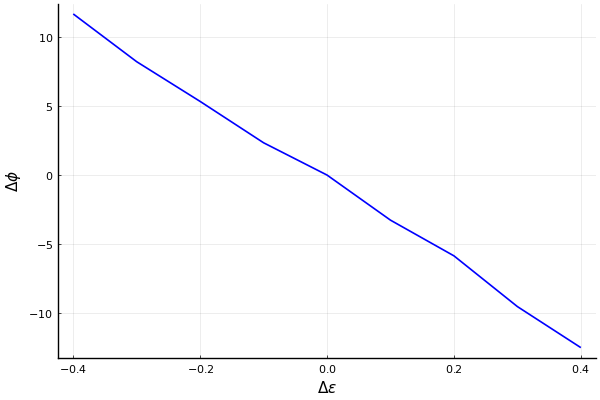

In [101]:
plot(Δε,Δϕ,c=:blue,lw=1.2,label="",xlabel=L"\Delta \varepsilon", ylabel=L"\Delta \phi")

# =================================================================================